# Projeto Prático 1.2 -- Visualizando Dados

O projeto prático 1.2 da disciplina de Redes Neurais Artificiais tem como ideia geral seguir o passo a passo das atividades solicitadas para aprender a utilizar as bibliotecas Python para praticar os conceitos de visualização de dados discutidos ao longo dessas primeiras aulas.

Na avaliação será levado em conta:
1. Corretude das tarefas solicitadas
2. Qualidade e boas práticas de codificação
3. Qualidade dos gráficos


Preecha aqui os integrantes da dupla e suas respectivas matrículas (duplo clique para editar):
- Felipe Getúlio Laranjeira do Nascimento 1515080534
- Lucas Pereira Reis 1515080583

## Apresentação da Atividade

Continuaremos utilizando o dataset 'autompg.csv' e vamos concentrar o uso na biblioteca matplotlib.pyplot, cuja documentação pode ser encontrada aqui: https://matplotlib.org/

In [16]:
## Reservado para imports
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
import seaborn as sns

## Atividade 7 -- Histograma

Construa o histograma do atributo alvo mpg utilizando bins de tamanho 1. O seu histograma deve ser intitulado 'Consumo', o eixo 'y' deve apresentar a unidade de medida 'milhas por galão'. O eixo x deve ser rotulado com os valores associados aos bins. A cor do gráfico deve ser em tons de cinza.

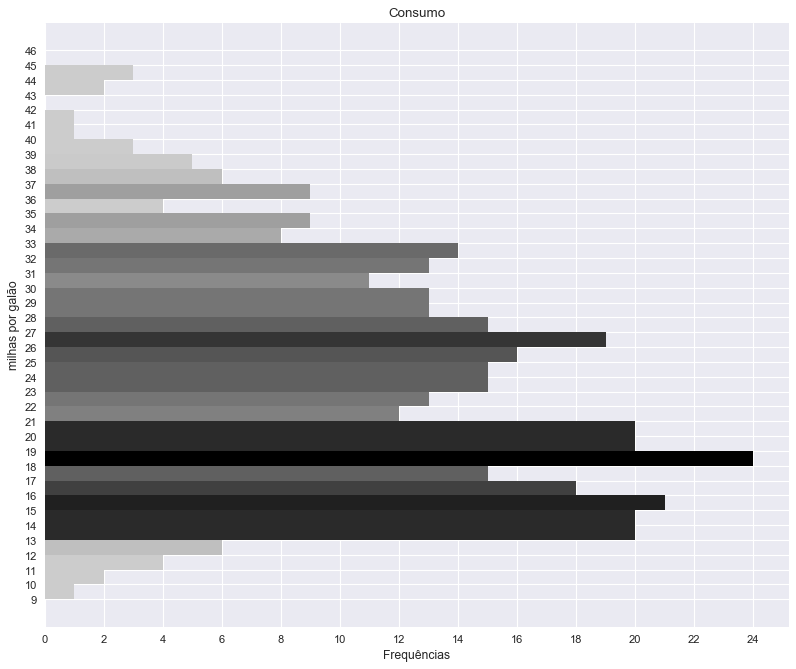

In [69]:
df = pd.read_csv('autompg.csv', sep=';')
df = df.dropna()

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

x = df.mpg.values
left_limit = int(df.mpg.min())
right_limit = int(df.mpg.max())+1

interval = np.arange(left_limit, right_limit)

plt.title('Consumo')
plt.xlabel('Frequências')
plt.ylabel('milhas por galão')
plt.yticks(np.arange(9, 47, step = 1))
plt.xticks(np.arange(0, 30, step = 2))
plt.grid(True)

N, bins, patches = plt.hist(x, bins = interval, orientation='horizontal')

fracs = np.clip(N / N.max(), 0.2, 1)

for frac, patch in zip(fracs, patches):
    patch.set_facecolor(str(1-frac))

## Atividade 8 -- Boxplot

1. Obtenha o boxplot do atributo alvo mpg
2. Obtenha o boxplot do peso dos carros
3. Responda: o peso dos carros distribuído de maneira simétrica?

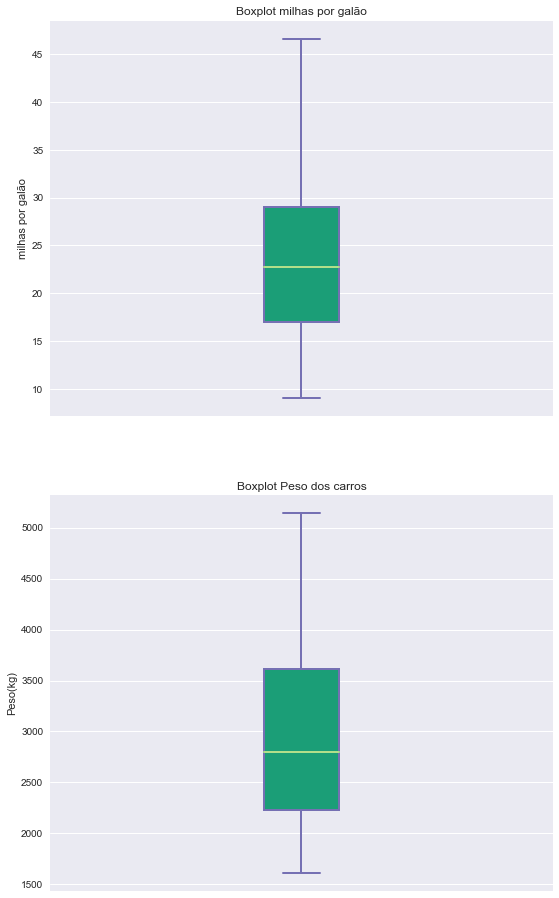

In [54]:
def configure_boxplot(bp):
    for box in bp['boxes']:
        box.set( color='#7570b3', linewidth=2)
        box.set( facecolor = '#1b9e77' )
        
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)


qnt_figures = 2
fig = plt.figure(1, figsize=(9, 8 * qnt_figures))

ax = plt.subplot(qnt_figures, 1, 1)
bp_mpg = ax.boxplot(df.mpg.values, patch_artist = True)

plt.title('Boxplot milhas por galão')
plt.xticks([])
plt.ylabel('milhas por galão')
ax.yaxis.grid(True)

ax = plt.subplot(qnt_figures, 1, 2)
bp_weight = ax.boxplot(df.weight.values, patch_artist = True)

plt.title('Boxplot Peso dos carros')
plt.xticks([])
plt.ylabel('Peso(kg)')
ax.yaxis.grid(True)

#1 - Boxplot do atributo alvo mpg
configure_boxplot(bp_mpg)
#2 - Boxplot do peso dos carros
configure_boxplot(bp_weight)

**Resposta**: Não, está distribuído de maneira assimétrica pois à uma concentração maior de dados abaixo da mediana

## Atividade 9 -- Heat Map

Produza um mapa de calor dos atributos 'mpg' e 'cylinders'


Atividade cancelada pela professora.

## Atividade 10 -- Scatter Plot

Produza um scatterplot dos atributos 'weight' e 'mpg'

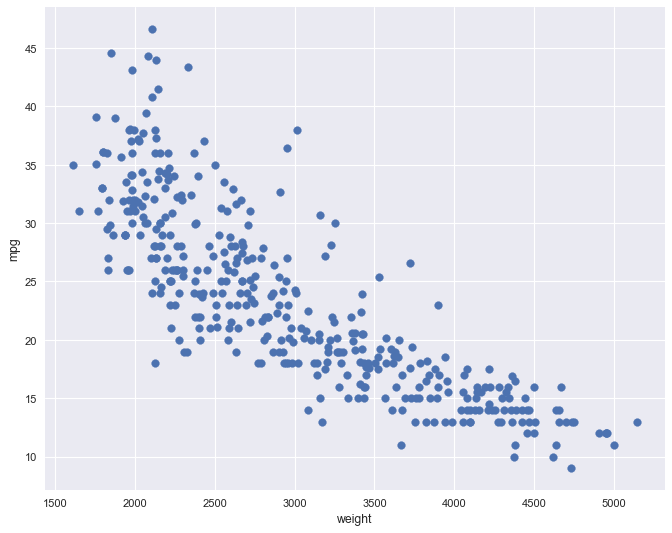

In [23]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df.weight,df.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

## Atividade 11 -- Boxplot categorizado

1. Construa boxplots do atributo 'mpg' categorizados por ano, isto é, uma única figura contendo vários boxplots do consumo dos veículos agrupados segundo o ano.
2. É possível observar uma tendência de aumento de eficiência (maior mpg) com o passar dos anos?

C:\Users\lucas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


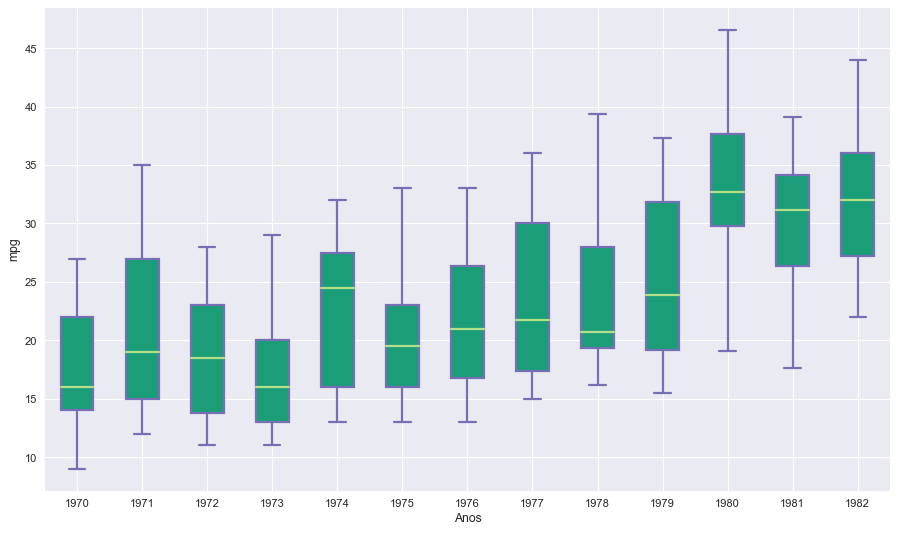

In [70]:
plt.figure(num=None, figsize=(30, 8), dpi=80, facecolor='w', edgecolor='k')

year = pd.unique(df.modelyear)
mpg_year = []
labels = []
for y in year:
    mpg_year.append(df[df.modelyear == y].mpg)
    labels.append(str('19' + str(int(y))))

    
ax = plt.subplot(1, 2, 1)

bp_mpg = ax.boxplot(mpg_year, patch_artist = True)
configure_boxplot(bp_mpg)
ax.set_xticklabels(labels)
plt.xlabel('Anos')
plt.ylabel('mpg')
plt.show()

**Resposta**: Analisando o gráfico, é possível perceber que o crescimento dos valores não é linear, mas há um certo aumento gradual do valor da mediana do *mpg* ao longo dos anos, ou seja, há uma tendência de aumento de eficiência.